In [ ]:
import pandas as pd
import numpy as np
import time,datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [ ]:
uber_data = pd.read_csv('My Uber Drives - 2016.csv')

In [ ]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
uber_data = uber_data.rename(columns = {uber_data.columns[0]:'START_DATE',
                                        uber_data.columns[1]:'END_DATE',
                                        uber_data.columns[2]:'CATEGORY',
                                        uber_data.columns[3]:'START',
                                        uber_data.columns[4]:'STOP',
                                        uber_data.columns[5]: 'MILES',
                                        uber_data.columns[6]:'PURPOSE'})

In [ ]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE   653 non-null    datetime64[ns]
 1   END_DATE     653 non-null    datetime64[ns]
 2   CATEGORY     653 non-null    object        
 3   START        653 non-null    object        
 4   STOP         653 non-null    object        
 5   MILES        653 non-null    float64       
 6   PURPOSE      653 non-null    object        
 7   HOUR         653 non-null    int64         
 8   DAY          653 non-null    int64         
 9   MONTH        653 non-null    int64         
 10  WEEKDAY      653 non-null    object        
 11  DAY_OF_WEEK  653 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 66.3+ KB


## **Data** **Cleaning**

In [ ]:
uber_data.duplicated().sum()

np.int64(1)

In [ ]:
print(uber_data.isnull().sum())
print(uber_data.isnull().sum().sum())

uber_data=uber_data.dropna()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64
507


In [ ]:
uber_data.drop_duplicates(inplace=True)

In [ ]:
uber_data.duplicated().sum()

np.int64(0)

In [ ]:
# Filling NULL values in feature PURPOSE
uber_data['PURPOSE'] = uber_data['PURPOSE'].fillna("UNKNOWN")

In [ ]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2


In [ ]:
#Checking For Null values
uber_data.isnull().sum()

,0
START_DATE,0
END_DATE,0
CATEGORY,0
START,0
STOP,0
MILES,0
PURPOSE,0
HOUR,0
DAY,0
MONTH,0


# **Data** **Preprocessing**

In [ ]:
#converting START_DATE and END_DATE into datetime format
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format='mixed')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], format='mixed')

In [ ]:
#Checking the chnages
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE   652 non-null    datetime64[ns]
 1   END_DATE     652 non-null    datetime64[ns]
 2   CATEGORY     652 non-null    object        
 3   START        652 non-null    object        
 4   STOP         652 non-null    object        
 5   MILES        652 non-null    float64       
 6   PURPOSE      652 non-null    object        
 7   HOUR         652 non-null    int64         
 8   DAY          652 non-null    int64         
 9   MONTH        652 non-null    int64         
 10  WEEKDAY      652 non-null    object        
 11  DAY_OF_WEEK  652 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 66.2+ KB


In [ ]:
#create new feature representing time of the ride - morning, afternoon, evening, night
uber_data['TIME_DAY'] = uber_data['START_DATE'].apply(lambda i : i.hour)
uber_data['TIME_OF_DAY'] = uber_data['START_DATE'].apply(lambda i : i.hour)
uber_data['TIME_OF_DAY'] = pd.cut(x = uber_data['TIME_OF_DAY'], bins = [0, 6, 11, 17, 21, 24],\
                                labels = ['Night', 'Morning','Afternoon','Evening','Night'], ordered = False)

In [ ]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,TIME_DAY,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4,21,Evening
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5,20,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1,17,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2,14,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2,17,Afternoon


In [ ]:
#create new feature representing month of the ride
uber_data['MONTH_OF_THE_RIDE'] = uber_data['START_DATE'].apply(lambda i : i.month)
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
uber_data['MONTH_OF_THE_RIDE'] = uber_data['MONTH_OF_THE_RIDE'].map(month_label)

In [ ]:
uber_data.sample(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE
1084,2016-12-21 15:55:00,2016-12-21 16:05:00,Business,Unknown Location,Islamabad,2.1,Errand/Supplies,15,21,12,Wednesday,2,15,Afternoon,Dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5,21,Evening,Dec
143,2016-02-20 19:28:00,2016-02-20 19:49:00,Business,Unknown Location,Unknown Location,7.7,Errand/Supplies,19,20,2,Saturday,5,19,Evening,Feb
286,2016-03-30 22:05:00,2016-03-30 22:55:00,Business,Orlando,Kissimmee,28.8,Meal/Entertain,22,30,3,Wednesday,2,22,Night,Mar
104,2016-02-14 14:07:00,2016-02-14 14:40:00,Business,East Elmhurst,New York,8.1,Meeting,14,14,2,Sunday,6,14,Afternoon,Feb


In [ ]:
#create new feature representing day (week) of the ride
uber_data['DAY_OF_THE_RIDE'] = uber_data['START_DATE'].apply(lambda i : i.weekday())
day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
uber_data['DAY_OF_THE_RIDE'] = uber_data['DAY_OF_THE_RIDE'].map(day_label)

In [ ]:
# duration of the ride
uber_data['DURATION_OF_THE_RIDE'] = (uber_data['END_DATE'] - uber_data['START_DATE'])

In [ ]:
uber_data.sample(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,MONTH,WEEKDAY,DAY_OF_WEEK,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
930,2016-11-10 09:46:00,2016-11-10 10:15:00,Business,Berkeley,San Francisco,12.6,Temporary Site,9,10,11,Thursday,3,9,Morning,Nov,Thus,0 days 00:29:00
462,2016-06-24 12:50:00,2016-06-24 13:12:00,Business,Raleigh,Morrisville,9.0,Errand/Supplies,12,24,6,Friday,4,12,Afternoon,June,Fri,0 days 00:22:00
988,2016-11-22 15:12:00,2016-11-22 15:27:00,Business,Cary,Cary,5.5,Meeting,15,22,11,Tuesday,1,15,Afternoon,Nov,Tues,0 days 00:15:00
1000,2016-11-26 17:00:00,2016-11-26 17:12:00,Business,Cary,Apex,5.1,Meeting,17,26,11,Saturday,5,17,Afternoon,Nov,Sat,0 days 00:12:00
398,2016-06-03 18:41:00,2016-06-03 18:53:00,Business,Morrisville,Cary,3.1,Errand/Supplies,18,3,6,Friday,4,18,Evening,June,Fri,0 days 00:12:00


# **Exploring** **the** **data**

In [ ]:
# summary statistics of the dataset
uber_data.describe()

,START_DATE,END_DATE,MILES,HOUR,DAY,MONTH,DAY_OF_WEEK,TIME_DAY,DURATION_OF_THE_RIDE
count,652,652,652.000000,652.00000,652.000000,652.000000,652.000000,652.00000,652
mean,2016-06-29 03:41:43.803681024,2016-06-29 04:05:07.546012160,11.198313,14.81135,15.700920,6.417178,3.030675,14.81135,0 days 00:23:23.742331288
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000,0.00000,1.000000,1.000000,0.000000,0.00000,0 days 00:02:00
25%,2016-03-07 11:28:15,2016-03-07 11:46:15,3.200000,12.00000,8.000000,3.000000,1.000000,12.00000,0 days 00:11:00
50%,2016-06-06 20:37:00,2016-06-06 20:58:30,6.400000,15.00000,16.000000,6.000000,3.000000,15.00000,0 days 00:17:30
75%,2016-11-18 21:31:15,2016-11-18 21:45:45,10.400000,18.00000,23.000000,11.000000,5.000000,18.00000,0 days 00:28:00
max,2016-12-31 22:08:00,2016-12-31 23:51:00,310.300000,23.00000,31.000000,12.000000,6.000000,23.00000,0 days 05:30:00
std,NaN,NaN,23.004020,4.81035,8.833907,3.976994,1.951559,4.81035,0 days 00:25:47.360901144


# **Data** **Visualization**

Text(0.5, 1.0, 'Distribution of Categories in CATEGORY')

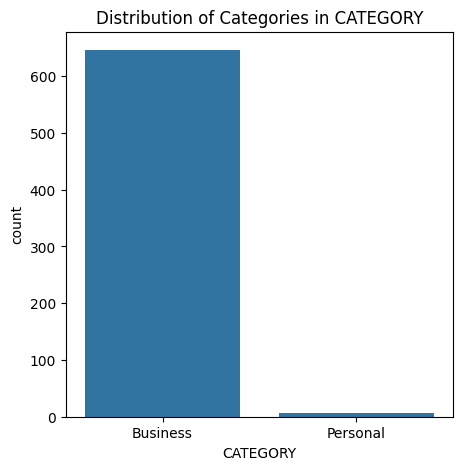

In [ ]:
# Convert 'CATEGORY' column to categorical data type
uber_data['CATEGORY'] = uber_data['CATEGORY'].astype('category')
# Creating figure and axes
fig, axes = plt.subplots(figsize=(5, 5))
# Distribution of Categories in CATEGORY
sns.countplot(data=uber_data, x='CATEGORY', ax=axes)
axes.set_title('Distribution of Categories in CATEGORY')

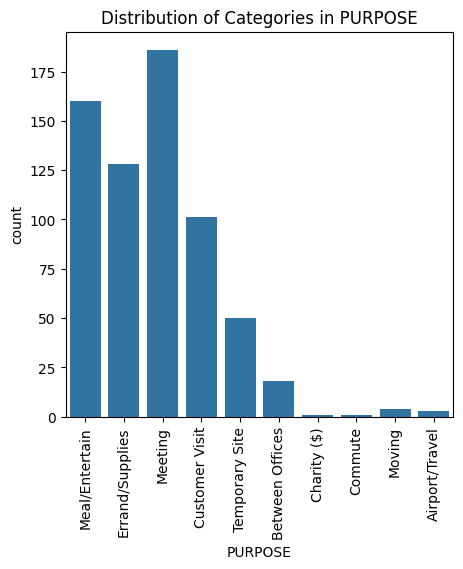

In [ ]:
# Creating figure and axes
fig, axes = plt.subplots(figsize=(5, 5))
# Distribution of Categories in PURPOSE
sns.countplot(data=uber_data, x='PURPOSE')
axes.set_title('Distribution of Categories in PURPOSE')
axes.tick_params(axis='x', rotation=90)

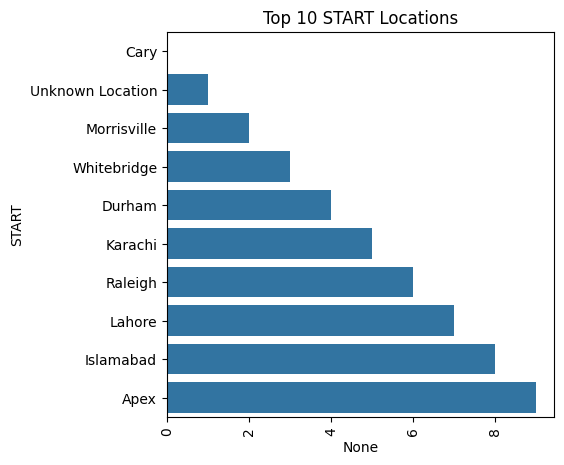

In [ ]:
# Creating figure and axes
fig, axes = plt.subplots(figsize=(5, 5))
# Top 10 locations for START
temp = uber_data['START'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp, x=temp.index, y='START', ax=axes)
axes.set_title('Top 10 START Locations')
axes.tick_params(axis='x', rotation=90)
plt.show()

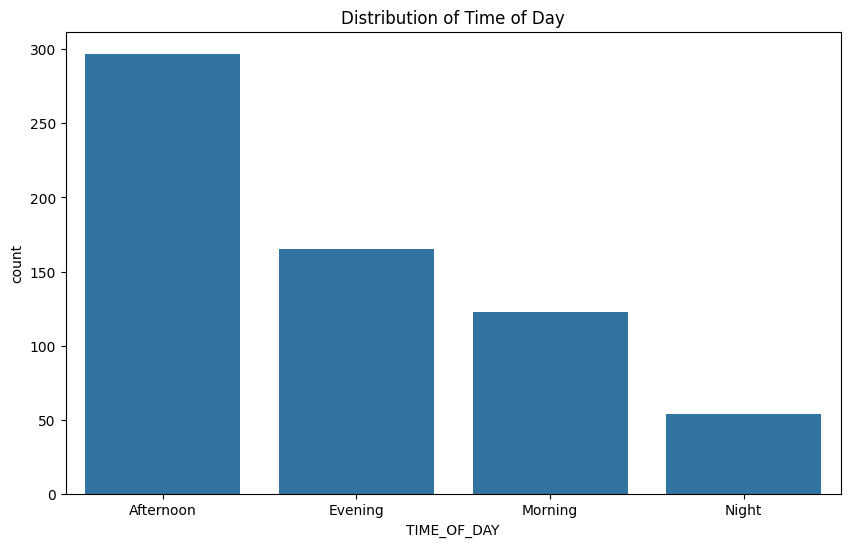

In [ ]:
# Convert 'TIME_OF_DAY' column to categorical data type
uber_data['TIME_OF_DAY'] = uber_data['TIME_OF_DAY'].astype('category')
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_data, x='TIME_OF_DAY')
plt.title('Distribution of Time of Day')
plt.show()

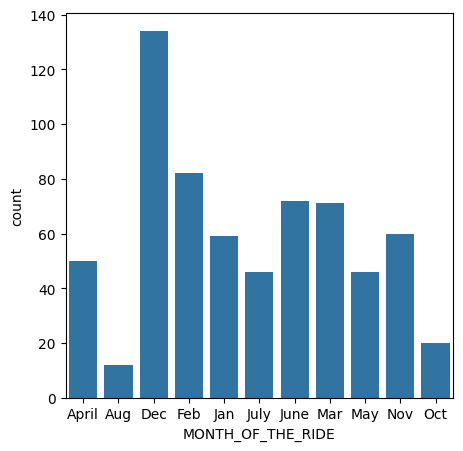

In [ ]:
# Convert 'MONTH_OF_THE_RIDE' column to categorical data type
uber_data['MONTH_OF_THE_RIDE'] = uber_data['MONTH_OF_THE_RIDE'].astype('category')
#Visualizing MONTH_OF_THE_RIDE Column
plt.figure(figsize=(5, 5))
sns.countplot(data=uber_data, x='MONTH_OF_THE_RIDE')
plt.show()

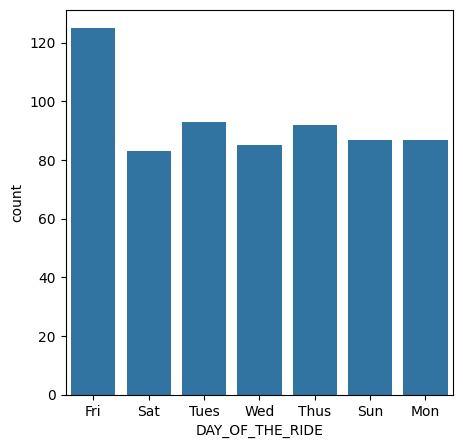

In [ ]:
#Visualizing DAY_OF_THE_RIDE Column
plt.figure(figsize=(5, 5))
sns.countplot(data=uber_data, x='DAY_OF_THE_RIDE')
plt.show()

In [ ]:
print("\n..........Average Length of the Trip..............\n")
print('Business:', round(uber_data[uber_data['CATEGORY'] == 'Business'].MILES.mean(), 3))
print('Personal:', round(uber_data[uber_data['CATEGORY'] == 'Personal'].MILES.mean(), 3))
print('Meal/Entertain:', round(uber_data[uber_data['PURPOSE'] == 'Meal/Entertain'].MILES.mean(), 3))


..........Average Length of the Trip..............

Business: 10.972
Personal: 35.583
Meal/Entertain: 5.698


# **Predictive Analysis using Regression**

In [ ]:
# --- SAMPLE PREDICTION ---
sample_input = {
    'CATEGORY': 'Business',
    'START': 'New York',
    'STOP': 'New York',
    'PURPOSE': 'Meeting',
    'START_HOUR': 9,
    'DAY_OF_WEEK': 0
}
# Encode categorical inputs using the label encoders
encoded_input = []
for col in ['CATEGORY', 'START', 'STOP', 'PURPOSE']:
    val = sample_input[col]
    encoded_val = label_encoders[col].transform([val])[0] if val in label_encoders[col].classes_ else 0
    encoded_input.append(encoded_val)
# Add numeric values
encoded_input.append(sample_input['START_HOUR'])
encoded_input.append(sample_input['DAY_OF_WEEK'])
# Predict
predicted_miles = model.predict([encoded_input])[0]
print(f" Predicted miles for the sample trip: {round(predicted_miles, 2)}")

 Predicted miles for the sample trip: 9.72


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
